### I want to implement linear regression from scratch

In some examples people usually implement predicting houses prices
In my case I want to predict car prices according to
- `car mileage`
- `year of car manufacture`
- `car model`
- etc

In [1]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt

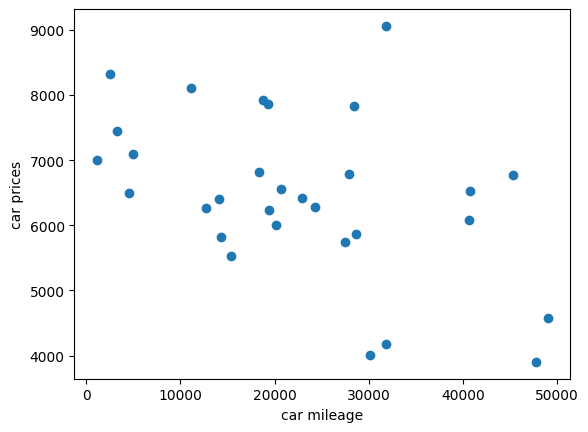

In [2]:
# get data | btw its all random 'cause im lazy
# rng = np.random.default_rng(123456)
car_mileage = np.array([1132, 2467,  3302,  4537,  5011, 11107, 12711, 14098, 14355, 15329, 18323, 18754, 19302, 19401, 20189, 20668, 22902, 24305, 27500, 27896, 28443, 28697, 30173, 31843, 31862, 40640, 40805, 45311, 47767, 49037])
car_prices = np.array([7000,  8320,  7444,  6492,  7102,  8103, 6263, 6402,  5828,  5525,  6826, 7924, 7869, 6233,  6012,  6560,  6425, 6284,  5745,  6785,  7840,  5865,  4013,  4180, 9062,  6078,  6530,  6776,  3903, 4580])

plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Right now we have arrays `car_mileage` which refers to x (or, feature variable)
and `car_price` which refers to y (or, target variable)

This is called training set (dataset)

We have to move our dataset through learning algorithm which is some function `f` (it is also called `model`).

What will be our function `f` mathematically look like? Let's take a look below

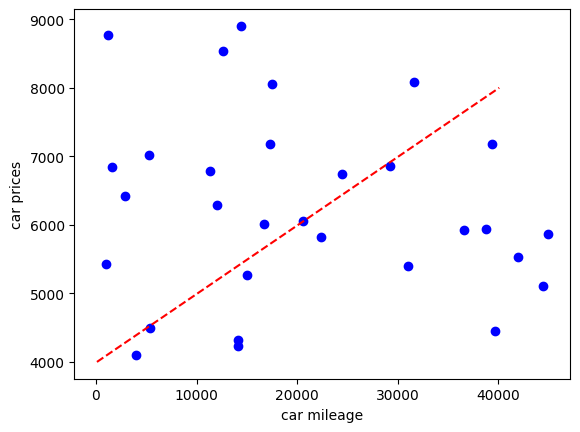

Red line is simple linear function which is kind of mean of values. So we want to pick up such line so it fits the data and we could predict the values

And mathematically it looks like `f(x)=wx + b`

What are `w` and `b` numbers? It is called _parameters_. Also `w` is called _weight_ and `b` is called _bias_

So to pick up best fitting line to our data we have to find values `w` and `b`

### If you are unfamiliar with linear function, this section is for you

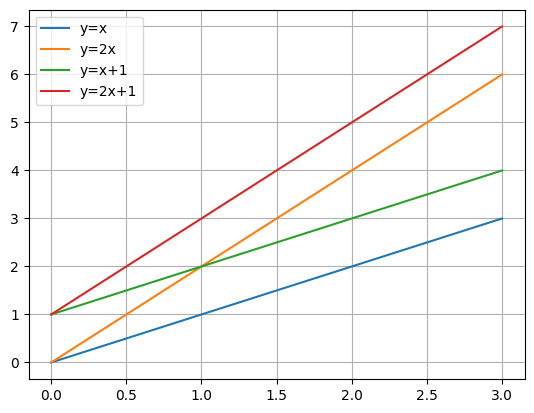

As you can see parameter `w` before `x` is changing slope of a line while `b` set the starting height of a line

So changing `w` and `b` we can find best fitting line for our data. The question is _"How we find these parameters?"_

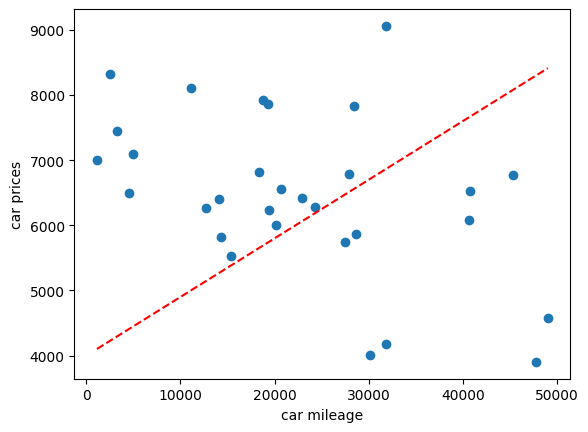

In [3]:
# We can just start guessing values
w, b = 0.09, 4000

y_prediction = []

# for every car_mileage we calculate _y_ as a prediction
for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Seems parameters `0.09 for w` and `4000 for b` aren't seems good to predictions

Let's try another parameters

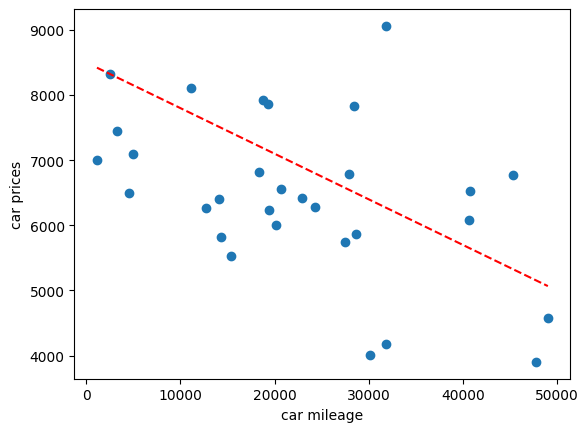

In [4]:
w, b = -0.07, 8500

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Looks much better. But still incorrect

So we have to learn something new

## Cost function

Imagine simple linear function from 0 to 5

Our prediction linear function will be `2x+1 (w=2, b=1)`

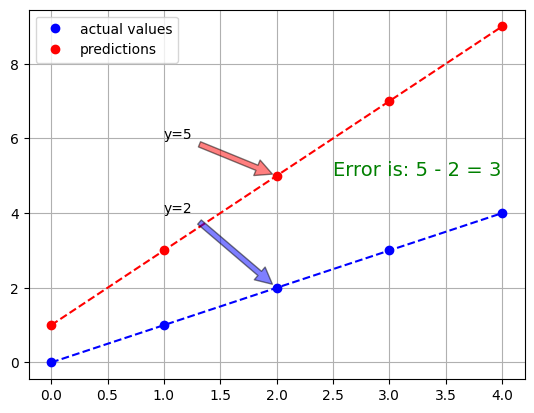

In [5]:
x = np.arange(5)
w, b = 2, 1

plt.plot(x, 'b--')
plt.plot(x, 'bo', label="actual values")
plt.plot(w*x+b, 'r--')
plt.plot(w*x+b, 'ro', label="predictions")
plt.legend()
plt.annotate('y=5', xy=(2, 5), xytext=(1, 6),
             arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.5))
plt.annotate('y=2', xy=(2, 2), xytext=(1, 4),
             arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.5))
plt.text(2.5, 5, 'Error is: 5 - 2 = 3', color="Green", fontsize=14)
plt.grid(True)
plt.show()

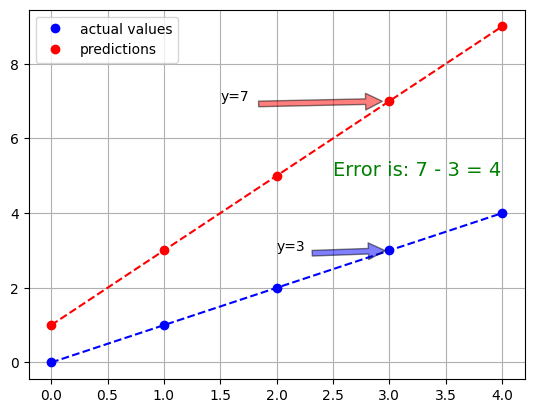

In [6]:
x = np.arange(5)
w, b = 2, 1

plt.plot(x, 'b--')
plt.plot(x, 'bo', label="actual values")
plt.plot(w*x+b, 'r--')
plt.plot(w*x+b, 'ro', label="predictions")
plt.legend()
plt.annotate('y=7', xy=(3, 7), xytext=(1.5, 7),
             arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.5))
plt.annotate('y=3', xy=(3, 3), xytext=(2, 3),
             arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.5))
plt.text(2.5, 5, 'Error is: 7 - 3 = 4', color="Green", fontsize=14)
plt.grid(True)
plt.show()

To find total errors sum between our predictions and actual data we calculate the sum of errors by substrackting `y` from `y_prediction` for every data point

`(y_prediction_1 - y_1) + (y_prediction_2 - y_2) + ...`

Let's find out total error

In [7]:
array = np.arange(5)
w, b = 2, 1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x # in our case y=x, so i use x

print('Our cost function is: ', sum_cost)

Our cost function is:  15


Let's tweak our parameters a little bit `w` equals `1` instead of `2`

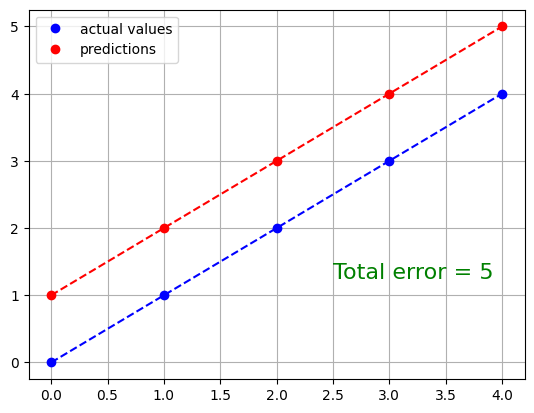

In [8]:
array = np.arange(5)
w, b = 1, 1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x

plt.plot(array, 'b--')
plt.plot(array, 'bo', label="actual values")
plt.plot(w*array+b, 'r--')
plt.plot(w*array+b, 'ro', label="predictions")
plt.legend()
plt.text(2.5, 1.25, f'Total error = {sum_cost}', color="Green", fontsize=16)
plt.grid(True)
plt.show()

As you can see, lines look more similar and total error is much lower (prev=15, now=5)

Let's tweak our parameters again `b` is `-1` instead of `1`

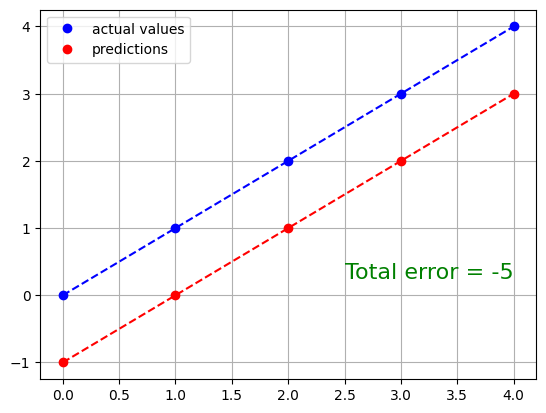

In [9]:
array = np.arange(5)
w, b = 1, -1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x

plt.plot(array, 'b--')
plt.plot(array, 'bo', label="actual values")
plt.plot(w*array+b, 'r--')
plt.plot(w*array+b, 'ro', label="predictions")
plt.legend()
plt.text(2.5, 0.25, f'Total error = {sum_cost}', color="Green", fontsize=16)
plt.grid(True)
plt.show()

Ooops, we got negative error. But look at lines. They are similar as before (they just swaped positions)

That's why we have to square the error

In [10]:
array = np.arange(5)
w, b = 1, -1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += (f(w,b,x) - x)**2

print(sum_cost) # 5

5


Alright. Finaly we change our `b` to `0`

In [11]:
array = np.arange(5)
w, b = 1, 0

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += (f(w,b,x) - x)**2

print(sum_cost) # 0

0


So when our cost function reaches `0` we definitely can say that we taught our linear model predict correct values. Actually it sometimes cannot be ideal `0`. So we want to minimize our cost function as minimum as possible.

To sum up, we'll call our cost function: `Squared error cost function` and final formula is J= $1\over{2m}$ $\sum_{i=1}^{m} (\hat{y}_i-y_i)^2$

Where:
- `m` is total amount of training examples
- $\hat{y}$ is our y_prediction

## Gradient descent

Let's find cost for our data

In [24]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / (len(y_true) * 2)
    return cost

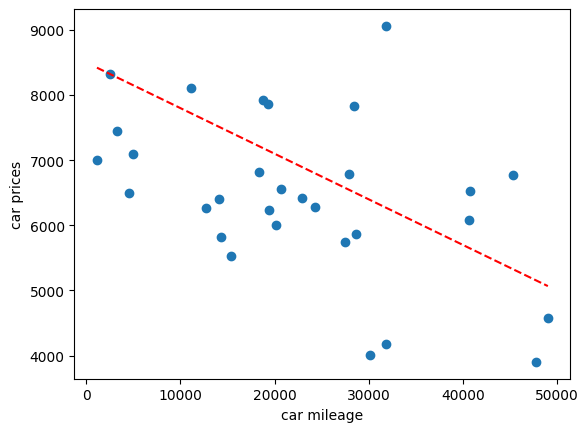

762_643.7472983333


In [23]:
w, b = -0.07, 8500

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = mean_squared_error(car_prices, y_prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}')

Isn't good. Right? :) Let's tweak parameters

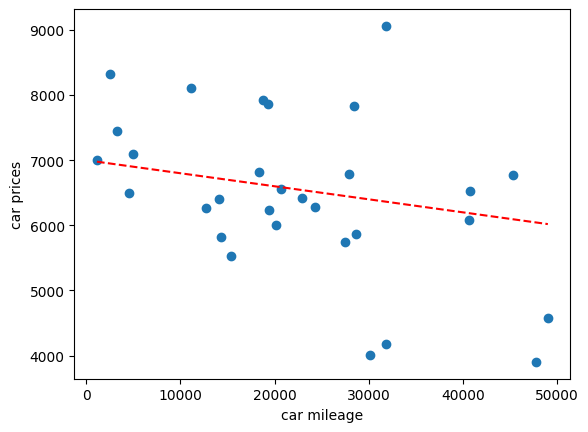

639_046.2211399999


In [25]:
w, b = -0.02, 7000

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = mean_squared_error(car_prices, y_prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}')

Looks better. But Im tired guessing numbers. Let's introduce `Gradient descent`

C:\Users\shelu\AppData\Local\Temp\ipykernel_3420\1161932080.py:22: RuntimeWarning: overflow encountered in scalar add
  w_derivative = -(1/m) * sum(car_mileage * (car_prices - y_predicted))


Iteration 1: Cost 21_649_859.65, Weight -0.0044115133, Bias 3232.8166666666666
Iteration 2: Cost 6_269_731.9569313405, Weight 0.06431530271813632, Bias 4899.065321435518
Iteration 3: Cost 1_586_120.3738673064, Weight 0.04834260442635485, Bias 4955.728972257177
Iteration 4: Cost 1_393_055.2384195977, Weight 0.04202430621329317, Bias 5164.516882217257
Iteration 5: Cost 1_271_602.7619360304, Weight 0.035313769786666935, Bias 5340.293601443856
Iteration 6: Cost 1_168_986.5278005356, Weight 0.029225424013387166, Bias 5503.996147655618
Iteration 7: Cost 1_081_888.4634684413, Weight 0.023606146258941196, Bias 5654.63223216643
Iteration 8: Cost 1_007_957.3586385195, Weight 0.0184300614177727, Bias 5793.435656981387
Iteration 9: Cost 945_202.661723099, Weight 0.013661129763903537, Bias 5921.315654439338
Iteration 10: Cost 891_934.7978707979, Weight 0.009267439382594852, Bias 6039.134009725202
Iteration 11: Cost 846_719.6114504492, Weight 0.005219452407934893, Bias 6147.68214932991
Iteration 12:

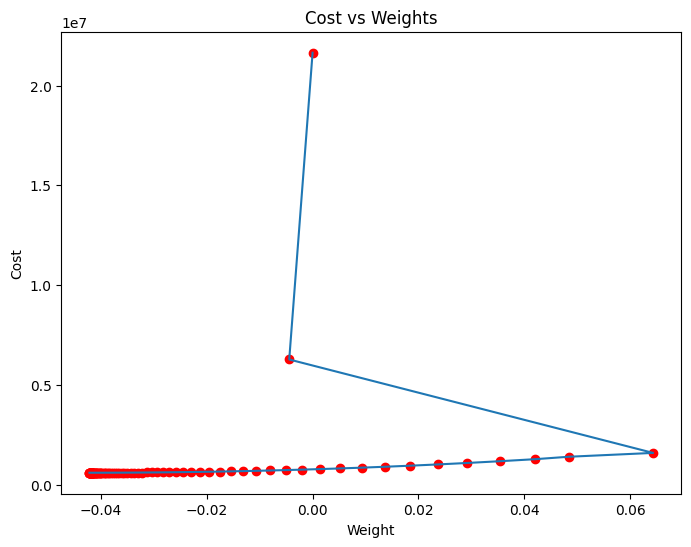

In [40]:
a_w = 0.000000001 # learning rate
a_b = 0.5

costs = []
weights = []
previous_cost = []

w, b = 0, 0

m = len(car_mileage)

for i in range(100):
    # Making predictions
    y_predicted = (w * car_mileage) + b

    # Calculating current loss
    current_cost = mean_squared_error(car_prices, y_predicted)
    costs.append(current_cost)
    weights.append(w)

    # Calculating the gradients
    w_derivative = -(1/m) * sum(car_mileage * (car_prices - y_predicted))
    b_derivative = -(1/m) * sum(car_prices - y_predicted)

    # Updating weights and bias
    w = w - (a_w * w_derivative)
    b = b - (a_b * b_derivative)

    # Printing the parameters for each 100th iteration
    print(f"Iteration {i+1}: Cost {current_cost:_}, Weight {w}, Bias {b}")

# Visualizing the weights and cost at for all iterations
plt.figure(figsize = (8,6))
plt.plot(weights, costs)
plt.scatter(weights, costs, marker='o', color='red')
plt.title("Cost vs Weights")
plt.ylabel("Cost")
plt.xlabel("Weight")
plt.show()

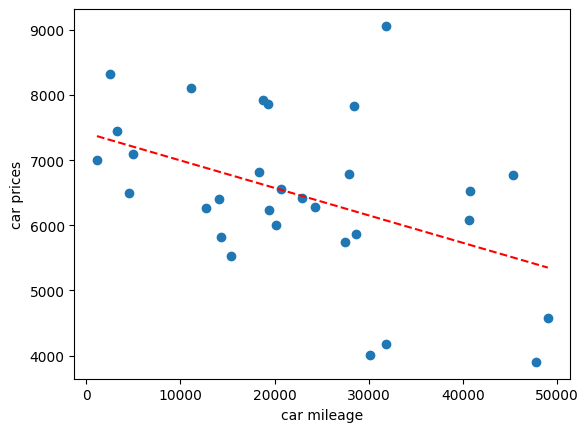

592_839.7934485547, -0.04214771881836343, 7417.848932981418


In [41]:
y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = mean_squared_error(car_prices, y_prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.scatter(car_mileage, car_prices)
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}, {w}, {b}')

So the line with parameters `w = -0.0421` and `b = 7417` fits our data the best